<a href="https://colab.research.google.com/github/rzunick/MNA-Vision-Computacional-Equipo-18/blob/main/3_2_Algoritmos_Mejoramiento_Imagen_Dominio_Espacial_Equipo_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Visión Computacional para Imágenes y Video**
Tecnológico de Monterrey

Dr. Gilberto Ochoa Ruiz

##**Semana 3: Actividad 1 Algoritmos de mejoramiento de imágenes en el dominio espacial**


##**Equipo 18**
**Integrantes del equipo:** 
* Ronald David Zuniga Sanchez - A01686240

# 4. Image Convolution

## Table of Contents
1. [Libraries](#libraries)
2. [Simple Example](#simple)
3. [PyTorch Convolution](#pytorch)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
#Código para importar carpeta de imágenes en Git-Hub
!git clone https://github.com/rzunick/MNA-Vision-Computacional-Equipo-18.git

# Modificar las rutas locales incluyendo: /content/MNA-Vision-Computacional-Equipo-18/

Cloning into 'MNA-Vision-Computacional-Equipo-18'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 70 (delta 24), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (70/70), 17.09 MiB | 4.75 MiB/s, done.


## Simple Convolution <a class="anchor" id="simple" ></a>

### Definition

- __I__: Image to convolve.
- __H__: filter matrix to convolve the image with.
- __J__: Result of the convolution.

The following graphics shows exemplary the mathematical operations of the convolution. The filter matrix __H__ is shifted over the input image __I__. The values 'under' the filter matrix are multiplicated with the corresponding values in __H__, summed up and writen to the result __J__. The target position is usually the position under the center of __H__.

<img src="data/convolution.png" width="70%">

In order to implement the convolution with a block filter, we need two methods. The first one will create the block filter matrix __H__ depending on the filter width/height __n__. 

A block filter holds the value $\dfrac{1}{n\cdot n}$ at each position:

In [3]:
def block_filter(n):
    H = np.ones((n, n)) / (n * n) # each element in H has the value 1/(n*n)
    return H

We will test the method by creating a filter with ``n = 5``:

In [4]:
H = block_filter(5)
print(H)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


Next, we define the actual convolution operation. To prevent invalid indices at the border of the image, we introduce the padding __p__.

In [5]:
def apply_filter(I, H):
    h, w = I.shape                         # image dimensions (height, width)
    n = H.shape[0]                         # filter size
    p = n // 2                             # padding size
    J = np.zeros_like(I)                   # output image, initialized with zeros
    
    for x in range(p, h-p):
        for y in range(p, w-p):
            J[x, y] = np.sum(I[x-p:x+n-p, y-p:y+n-p] * H)
    return J

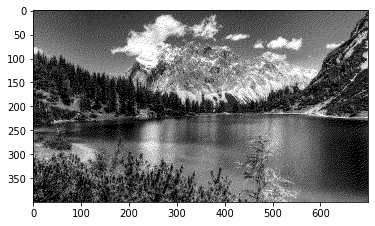

In [6]:
image = Image.open('/content/MNA-Vision-Computacional-Equipo-18/data/image.jpg')
image = image.convert('1') # convert image to black and white

image = np.array(image)

# image = np.zeros((200, 200), dtype=np.float)
# for x in range(200):
#     for y in range(200):
#         d = ((x-100)**2+(y-100)**2)**0.5
#         image[x, y] = d % 8 < 4

plt.imshow(image, cmap='gray',vmin=0.0, vmax=1.0)
plt.show()

In [7]:
image = image.astype(float)

Next we test our implementation and apply a block filter with size 7

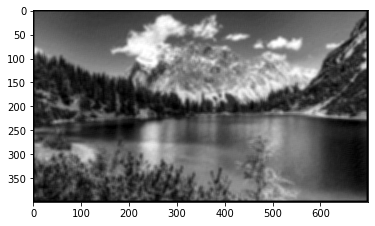

In [8]:
n = 7
H = block_filter(n)
J = apply_filter(image, H)

plt.imshow(J, cmap='gray')
plt.show()

## PyTorch Convolution <a class="anchor" id="pytorch" ></a>

In [9]:
from PIL import Image

img = Image.open('/content/MNA-Vision-Computacional-Equipo-18/data/image.jpg')
img.thumbnail((256,256), Image.ANTIALIAS) # Resize to half to reduce the size of this notebook.

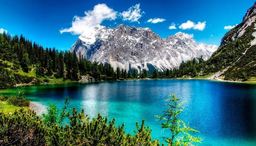

In [10]:
img

In [11]:
import torch, torchvision
from torchvision import transforms
from torch import nn

In [12]:
to_tensor = transforms.Compose([
   transforms.Grayscale(),  # Convert image to grayscale.
   transforms.ToTensor()    # Converts a PIL Image in the range [0, 255] to a torch.FloatTensor in the range [0.0, 1.0].
])

to_pil = transforms.Compose([
    transforms.ToPILImage()
])

In [13]:
input = to_tensor(img)
input.shape


torch.Size([1, 146, 256])

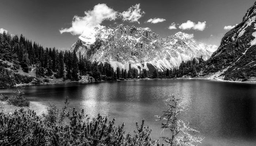

In [14]:
to_pil(input)

2D convolution over an input image:

+ `in_channels = 1`: an input is a grayscale image
+ `out_channels = 1`: an output is a grayscale image
+ `kernel_size = (3, 3)`: the kernel (filter) size is 3 x 3
+ `stride = 1`: the stride for the cross-correlation is 1
+ `padding = 1`: zero-paddings on both sides for 1 point for each dimension
+ `bias = False`: no bias parameter (for simplicity)

In [15]:
conv = nn.Conv2d(1, 1, (3, 3), stride=1, padding=1, bias=False)

In [16]:
# The code below does not work because the convolution layer requires the dimension for batch.
conv(input)

tensor([[[-0.0446,  0.0086,  0.0081,  ...,  0.0082,  0.0213,  0.1752],
         [ 0.1524,  0.2513,  0.2490,  ...,  0.3484,  0.4179,  0.3269],
         [ 0.1499,  0.2550,  0.2564,  ...,  0.4059,  0.3881,  0.2318],
         ...,
         [ 0.1365,  0.0789,  0.1066,  ...,  0.2507,  0.2461,  0.2692],
         [ 0.0133,  0.0480,  0.1494,  ...,  0.2829,  0.2670,  0.2936],
         [-0.0154,  0.1041,  0.1140,  ...,  0.2790,  0.2718,  0.2577]]],
       grad_fn=<SqueezeBackward1>)

We need to insert a dimension for a batch at dim=0.

In [17]:
input = input.unsqueeze(0)
input.shape

torch.Size([1, 1, 146, 256])

In [18]:
output = conv(input)
output.shape

torch.Size([1, 1, 146, 256])

Setting `padding=1` in the convolution layer, we obtain an image of the same size.

In [19]:
output.shape

torch.Size([1, 1, 146, 256])

We need to remove the first dimension before converting to a PIL object.

In [20]:
output.data.squeeze(dim=0).shape

torch.Size([1, 146, 256])

Display the output from the convolution layer by converting `output` to a PIL object.

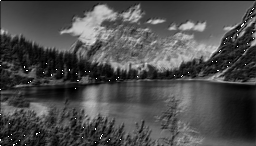

In [21]:
to_pil(output.data.squeeze(dim=0))

Clip every value in the output tensor within the range of [0, 1].

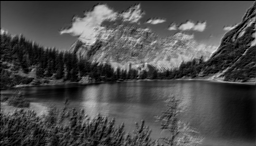

In [22]:
to_pil(torch.clamp(output, 0, 1).data.squeeze(dim=0))

In [23]:
def display(img1, img2):
    im1 = to_pil(torch.clamp(img1, 0, 1).data.squeeze(dim=0))
    im2 = to_pil(torch.clamp(img2, 0, 1).data.squeeze(dim=0))
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

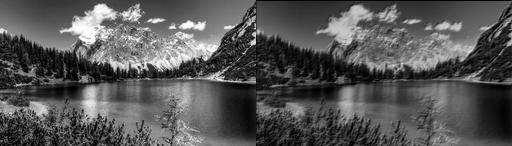

In [24]:
display(input, output)

### Identity

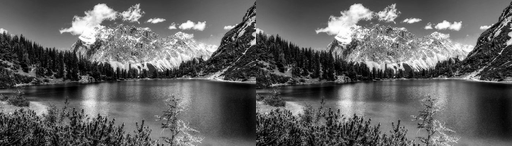

In [25]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 1, 0.],
    [0., 0., 0.],
]]])

output = conv(input)
display(input, output)

### Brighten

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 1.5000, 0.0000],
          [0.0000, 0.0000, 0.0000]]]])


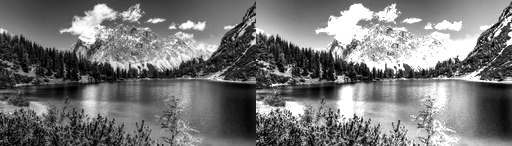

In [26]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 1.5, 0.],
    [0., 0., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### Darken

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 0.5000, 0.0000],
          [0.0000, 0.0000, 0.0000]]]])


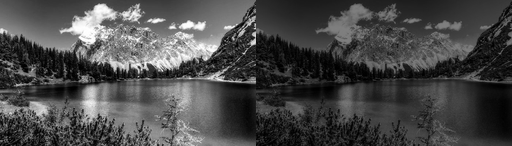

In [27]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 0.5, 0.],
    [0., 0., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### Box blur

tensor([[[[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]]]])


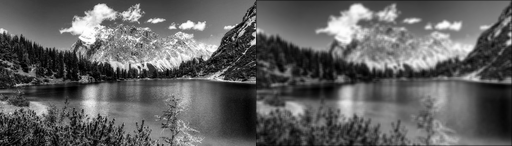

In [28]:
conv.weight.data = torch.ones((1, 1, 3,3), dtype=torch.float) / 9.
print(conv.weight.data)
output = conv(input)
display(input, output)

### Gaussian blur

tensor([[[[0.0625, 0.1250, 0.0625],
          [0.1250, 0.2500, 0.1250],
          [0.0625, 0.1250, 0.0625]]]])


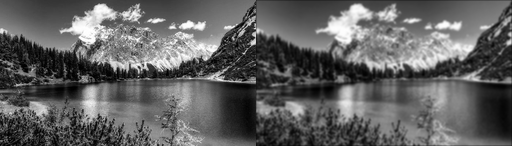

In [29]:
conv.weight.data = torch.tensor([[[
    [1., 2., 1.],
    [2., 4., 2.],
    [1., 2., 1.],
]]])/16.
print(conv.weight.data)
output = conv(input)
display(input, output)

### Sharpen

tensor([[[[ 0., -1.,  0.],
          [-1.,  5., -1.],
          [ 0., -1.,  0.]]]])


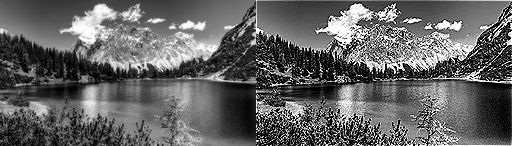

In [30]:
conv.weight.data = torch.tensor([[[
    [0., -1., 0.],
    [-1., 5., -1.],
    [0., -1., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

tensor([[[[ 0., -2.,  0.],
          [-2., 10., -2.],
          [ 0., -2.,  0.]]]])


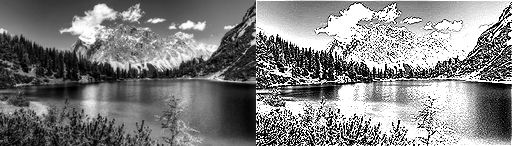

In [31]:
conv.weight.data = torch.tensor([[[
    [0., -2., 0.],
    [-2., 10., -2.],
    [0., -2., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### Edge detection

tensor([[[[ 0.,  1.,  0.],
          [ 1., -4.,  1.],
          [ 0.,  1.,  0.]]]])


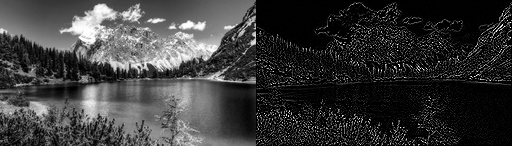

In [32]:
conv.weight.data = torch.tensor([[[
    [0., 1., 0.],
    [1., -4., 1.],
    [0., 1., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

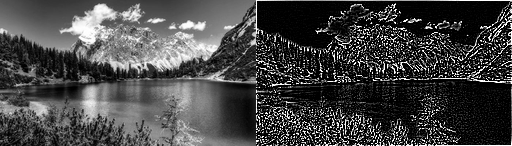

In [33]:
conv.weight.data = torch.tensor([[[
    [-1., -1., -1.],
    [-1., 8., -1.],
    [-1., -1., -1.],
]]])
output = conv(input)
display(input, output)

#**Ejercicio 1** (Ronald)
Implementa los detectores de línea siguientes usando código en Python (es decir, sin usar librerías de OpenCV): Prewitt, Sobel y Laplaciano. Investiga la complejidad algoritmica de estos, ¿cual es más eficiente?

##SOBEL

In [44]:
import sys
from PIL import Image, ImageFilter
from matplotlib.pyplot import figure

#apertura de la imagen original
imagen = Image.open('/content/MNA-Vision-Computacional-Equipo-18/data/beach.jpg').convert('L')

def Sobel():
 
    factor = 8

    coeficientes_h = [-1, 0, 1, -2, 0, 2, -1, 0, 1]
    coeficientes_v = [-1, -2, -1, 0, 0, 0, 1, 2, 1]

    #coeficientes con signo contrario
    coeficientes_h1 = [1, 0, -1, 2, 0, -2, 1, 0, -1]
    coeficientes_v1 = [1, 2, 1, 0, 0, 0, -1, -2, -1]

    datos_h = imagen.filter(ImageFilter.Kernel((3,3), coeficientes_h, factor)).getdata()
    datos_v = imagen.filter(ImageFilter.Kernel((3,3), coeficientes_v, factor)).getdata()

    datos= []
  

    for x in range(len(datos_h)):
        datos.append(round(((datos_h[x] ** 2) + (datos_v[x] ** 2)) ** 0.5))

    datos_h = imagen.filter(ImageFilter.Kernel((3,3), coeficientes_h1, factor)).getdata()
    datos_v = imagen.filter(ImageFilter.Kernel((3,3), coeficientes_v1, factor)).getdata()
 
    datos_signo_contrario = []
 
 
    for x in range(len(datos_h)):
 
        datos_signo_contrario.append(round(((datos_h[x] ** 2) + (datos_v[x] ** 2)) ** 0.5))

   
    datos_bordes = []
 

    for x in range(len(datos_h)):
 
        datos_bordes.append(datos[x] + datos_signo_contrario[x])

    return datos_bordes 

datos_bordes = Sobel()

nueva_imagen = Image.new('L', imagen.size)
nueva_imagen.putdata(datos_bordes)

#guardar el resultado
nueva_imagen.save('resultado_Sobel.jpeg')


#cerrar los objetos de la clase Image
imagen.close()
nueva_imagen.close()

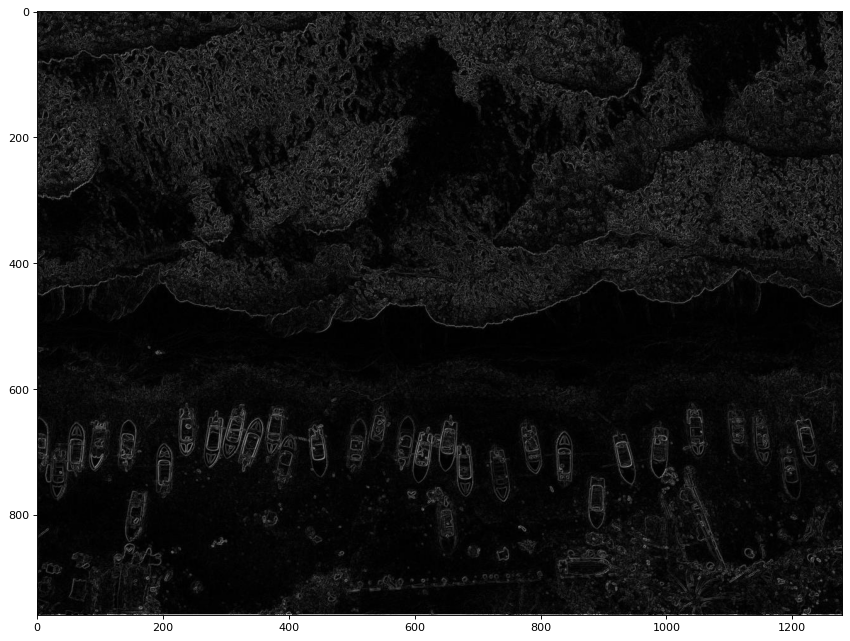

In [45]:
#Abrir la imagen resultado
image = Image.open("/content/resultado_Sobel.jpeg")

#Convertir a escala de grises y a arreglo de datos
gray_image = image.convert("L")
image_data = np.array(gray_image)

#Mostrar imagen
figure(figsize=(16, 10), dpi=80)
plt.imshow(image_data, cmap='gray')

## PREWITT

In [36]:
#apertura de la imagen original
imagen = Image.open('/content/MNA-Vision-Computacional-Equipo-18/data/beach.jpg').convert('L')

def Prewitt():
 
    factor = 6

    coeficientes_h = [-1, 0, 1, -1, 0, 1, -1, 0, 1]
    coeficientes_v = [-1, -1, -1, 0, 0, 0, 1, 1, 1]

    #coeficientes con signo contrario
    coeficientes_h1 = [1, 0, -1, 2, 0, -2, 1, 0, -1]
    coeficientes_v1 = [1, 2, 1, 0, 0, 0, -1, -2, -1]

    datos_h = imagen.filter(ImageFilter.Kernel((3,3), coeficientes_h, factor)).getdata()
    datos_v = imagen.filter(ImageFilter.Kernel((3,3), coeficientes_v, factor)).getdata()

    datos= []
  

    for x in range(len(datos_h)):
        datos.append(round(((datos_h[x] ** 2) + (datos_v[x] ** 2)) ** 0.5))

    datos_h = imagen.filter(ImageFilter.Kernel((3,3), coeficientes_h1, factor)).getdata()
    datos_v = imagen.filter(ImageFilter.Kernel((3,3), coeficientes_v1, factor)).getdata()
 
    datos_signo_contrario = []
 
 
    for x in range(len(datos_h)):
 
        datos_signo_contrario.append(round(((datos_h[x] ** 2) + (datos_v[x] ** 2)) ** 0.5))

   
    datos_bordes = []
 

    for x in range(len(datos_h)):
 
        datos_bordes.append(datos[x] + datos_signo_contrario[x])

    return datos_bordes 

datos_bordes = Prewitt()

nueva_imagen = Image.new('L', imagen.size)
nueva_imagen.putdata(datos_bordes)

#guardar el resultado
nueva_imagen.save('resultado_Prewitt.jpeg')


#cerrar los objetos de la clase Image
imagen.close()
nueva_imagen.close()

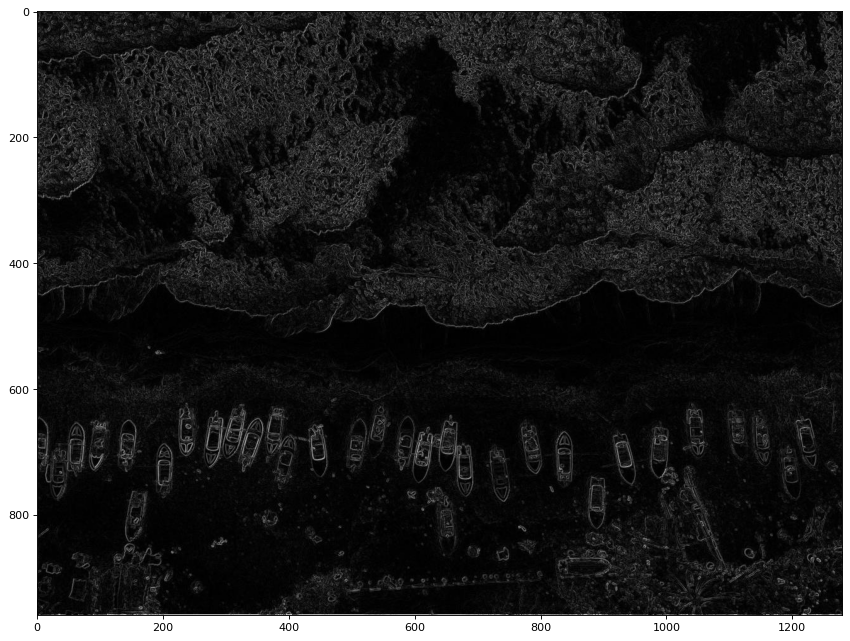

In [46]:
#Abrir la imagen resultado
image = Image.open("/content/resultado_Prewitt.jpeg")

#Convertir a escala de grises y a arreglo de datos
gray_image = image.convert("L")
image_data = np.array(gray_image)

#Mostrar imagen
figure(figsize=(16, 10), dpi=80)
plt.imshow(image_data, cmap='gray')

##LAPLACIANO

In [37]:
from PIL import Image, ImageFilter

tamaño = (5,5)
 
coeficientes = [0, 0, -1, 0, 0, 0, -1, -2, -1, 0, -1, -2, 16, -2, -1, 0, -1, -2, -1, 0, 0, 0, -1, 0, 0]
 
factor = 1
 
imagen_original = Image.open('/content/MNA-Vision-Computacional-Equipo-18/data/beach.jpg')
 
imagen_procesada = imagen_original.filter(ImageFilter.Kernel(tamaño, coeficientes, factor))
 
#se graba el resultado
 
imagen_procesada.save('resultado_Laplaciano.jpeg')
 
#se cierran ambos objetos creados de la clase Image
 
imagen_original.close()
 
imagen_procesada.close()

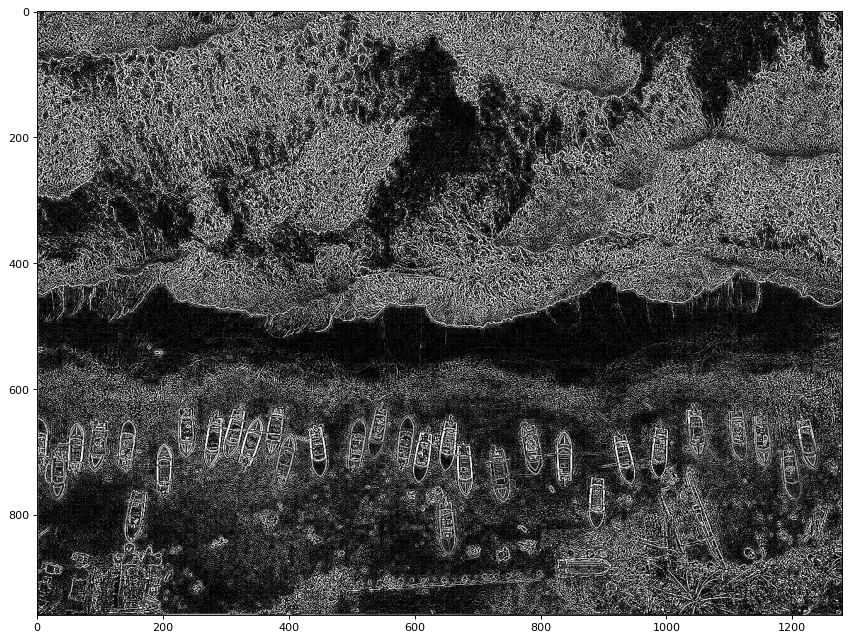

In [47]:
#Abrir la imagen resultado
image = Image.open("/content/resultado_Laplaciano.jpeg")

#Convertir a escala de grises y a arreglo de datos
gray_image = image.convert("L")
image_data = np.array(gray_image)

#Mostrar imagen
figure(figsize=(16, 10), dpi=80)
plt.imshow(image_data, cmap='gray')

##**Análisis**

Los filtros de convolución Prewitt, Sobel y Laplaciano son utilizados para detectar bordes en imágenes en visión computacional. Cada uno de estos filtros tiene una complejidad algorítmica diferente.

* El filtro de **Prewitt** es el más simple de los tres, ya que utiliza solo dos matrices de 3x3 para detectar bordes en las direcciones horizontal y vertical. La complejidad algorítmica de Prewitt es O(n^2), donde n es el tamaño de la imagen.

* El filtro de **Sobel** es un poco más complejo que el filtro de Prewitt, ya que utiliza tres matrices de 3x3 para detectar bordes en las direcciones horizontal, vertical y diagonal. La complejidad algorítmica de Sobel es también O(n^2).

* El filtro de **Laplaciano** es el más complejo de los tres, ya que utiliza una matriz de 3x3 para detectar bordes en todas las direcciones. La complejidad algorítmica del filtro de Laplaciano es también O(n^2).



##**Conclusión**

En términos de eficiencia, el filtro de Prewitt es el más eficiente de los tres, ya que es el más sencillo y utiliza menos operaciones matriciales. 

Sin embargo, el filtro de Sobel y Laplaciano son más precisos en la detección de bordes, especialmente en imágenes con bordes diagonales o con un alto nivel de ruido.

En general, la elección del filtro debe depender del uso específico del problema, si se requiere una mayor precisión se utilizarán Sobel o Laplaciano, si se requiere una mayor eficiencia se utilizará Prewitt.


##**Referencias**

* Li Bin, Mehdi Samiei yeganeh (2012). Comparison for Image Edge Detection Algorithms. Retrieved 28 January 2023, from https://www.iosrjournals.org/iosr-jce/papers/vol2-issue6/A0260104.pdf

* Chapter 10 "Image Segmentation" de Gonzalez, R. & Woods, R. (2018). Digital Image Processing.  4° Edition. Pearson. Retrieved 28 January 2023, from https://0-bc-vitalsource-com.biblioteca-ils.tec.mx/tenants/BIB_TECDEMTY/libraries?bookmeta_vbid=9781292223070

#**Ejercicio 2** (Miguel)
Implementa un algoritmos de realce o mejoramiento de imágenes mediante un algoritmo de en el cual se extraen las líneas de la imagen y después se aplica la diferencia con la imagen original, multiplicando los píxeles de la imagen “máscara” (las líneas encontradas) por un factor alfa mayor a 1.

#**Ejercicio 3** (Miguel)
Buscar una aplicación médica (en el libro de Gonzalez viene varios ejemplos de imágenes PET) y hacer mejoramiento usando la técnica de de la Figura 3.43 combinando diferentes etapas de procesamiento de imagenes